In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [6]:
mydata = pd.read_csv('Wholesale+Customers+Data.csv')

In [9]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [10]:
mydata.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
mydata.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [7]:
mydata.Channel.value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [10]:
mydata[mydata['Channel']== mydata['Channel'].max()]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...,...,...,...
418,419,Retail,Other,660,8494,18622,133,6740,776
421,422,Retail,Other,17063,4847,9053,1031,3415,1784
423,424,Retail,Other,17565,3686,4657,1059,1803,668
424,425,Retail,Other,16980,2884,12232,874,3213,249


In [11]:
mydata[mydata['Channel']== mydata['Channel'].min()]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
8,9,Hotel,Other,5963,3648,6192,425,1716,750
15,16,Hotel,Other,10253,1114,3821,397,964,412
17,18,Hotel,Other,5876,6157,2933,839,370,4478
19,20,Hotel,Other,7780,2495,9464,669,2518,501
...,...,...,...,...,...,...,...,...,...
434,435,Hotel,Other,16731,3922,7994,688,2371,838
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [13]:
mydata[mydata['Region']== mydata['Region'].max()]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [14]:
mydata[mydata['Region']== mydata['Region'].min()]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
196,197,Hotel,Lisbon,30624,7209,4897,18711,763,2876
197,198,Retail,Lisbon,2427,7097,10391,1127,4314,1468
198,199,Hotel,Lisbon,11686,2154,6824,3527,592,697
199,200,Hotel,Lisbon,9670,2280,2112,520,402,347
200,201,Retail,Lisbon,3067,13240,23127,3941,9959,731
...,...,...,...,...,...,...,...,...,...
268,269,Retail,Lisbon,11908,8053,19847,1069,6374,698
269,270,Hotel,Lisbon,15218,258,1138,2516,333,204
270,271,Hotel,Lisbon,4720,1032,975,5500,197,56
271,272,Hotel,Lisbon,2083,5007,1563,1120,147,1550


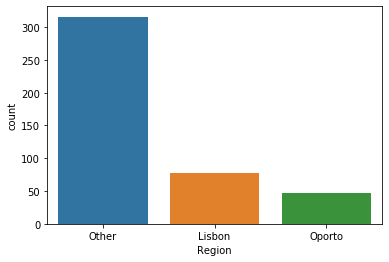

In [11]:
sns.countplot(x=mydata['Region'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D02BCEC588>,
      dtype=object)

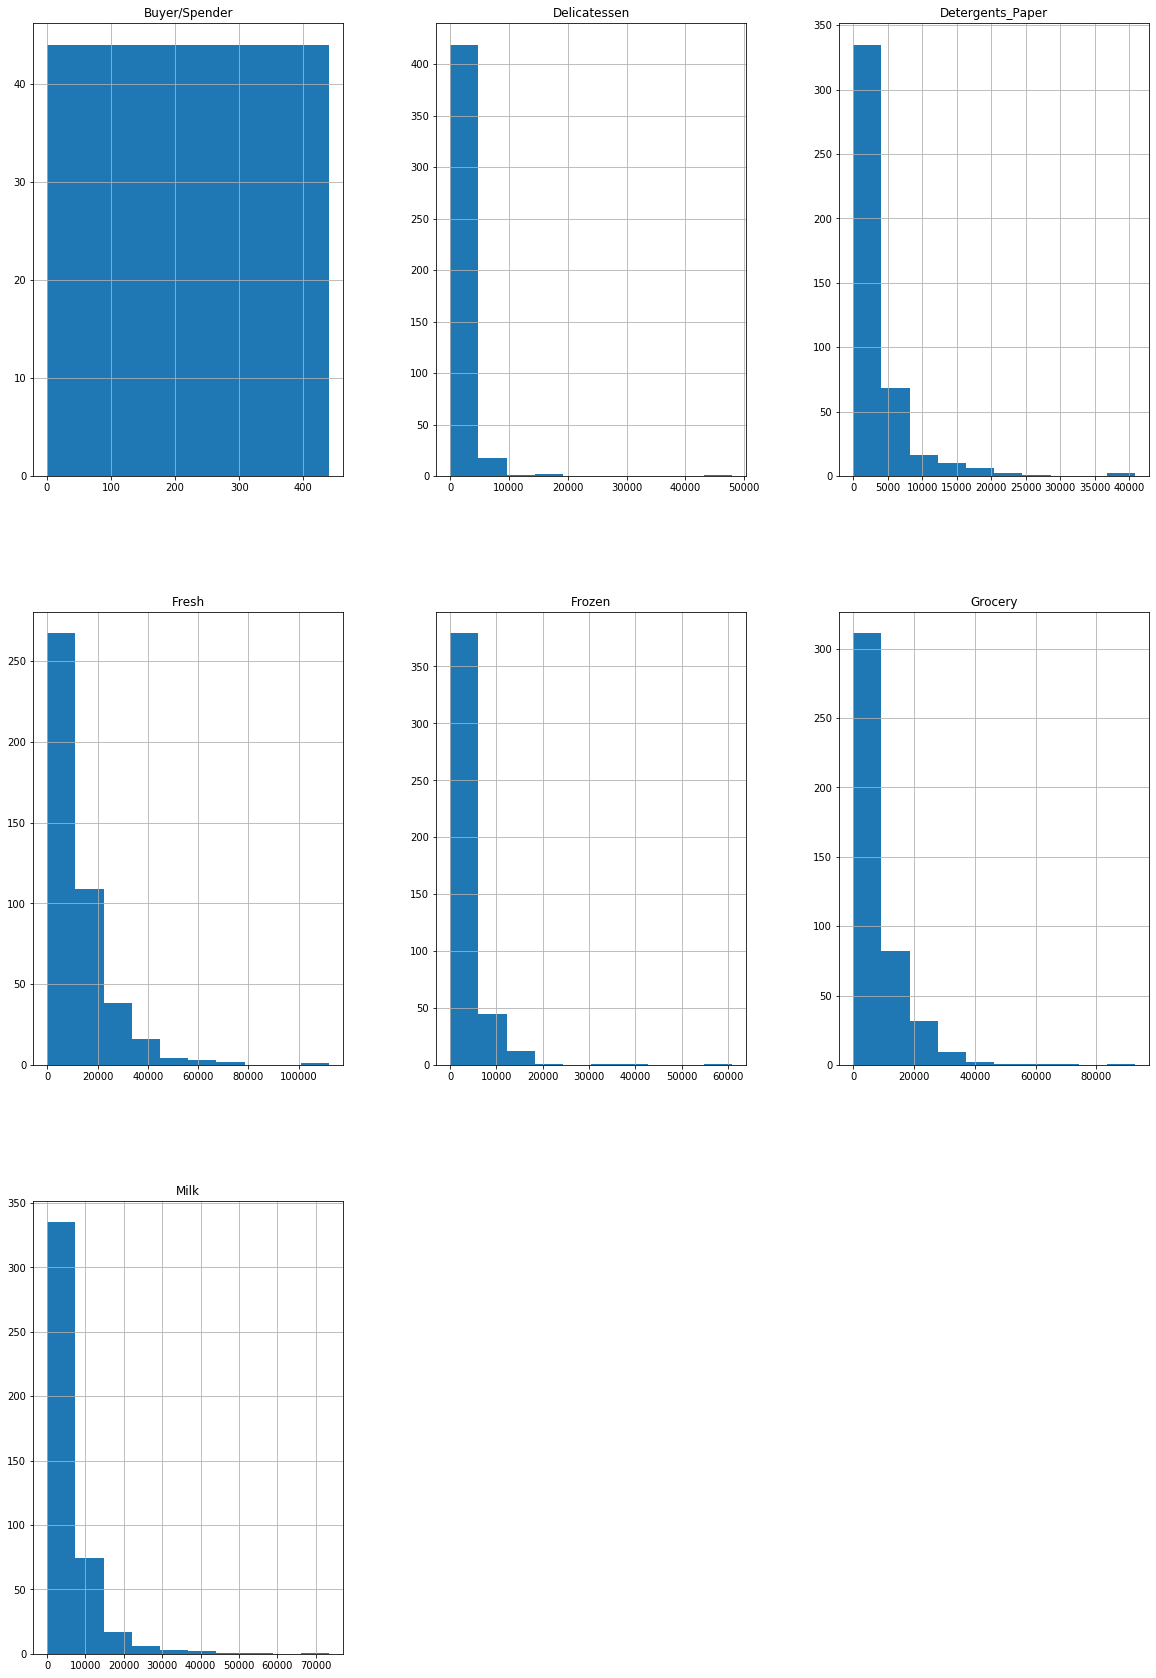

In [12]:
mydata.hist(figsize=(20,30))

In [15]:
Skewness = pd.DataFrame({'Region' : [stats.skew(mydata.Fresh),stats.skew(mydata.Milk),stats.skew(mydata.Grocery),stats.skew(mydata.Frozen),stats.skew(mydata.Detergents_Paper),stats.skew(mydata.Delicatessen)]},
                        index=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])  # Measure the skeweness of the required columns
Skewness

,Region
Fresh,2.552583
Milk,4.039922
Grocery,3.575187
Frozen,5.887826
Detergents_Paper,3.619458
Delicatessen,11.113534


In [16]:
corr = mydata.corr()
corr

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


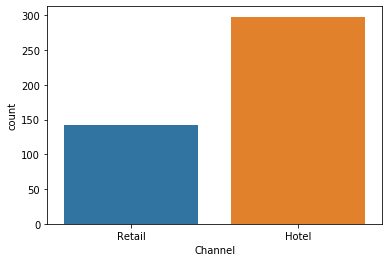

In [19]:
sns.countplot(x=mydata['Channel'])

In [22]:
mydata ['Total Spend'] = mydata ['Fresh']+ mydata ['Milk']+ mydata ['Grocery']+ mydata ['Frozen']+ mydata ['Detergents_Paper']+ mydata ['Delicatessen']

mydata


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D03130C7C8>,
      dtype=object)

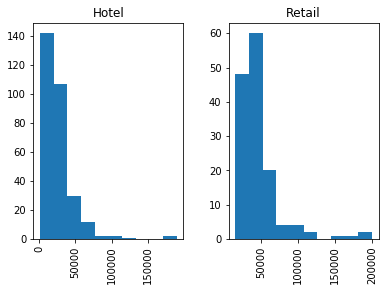

In [25]:
mydata.hist(by='Channel',column = 'Total Spend')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D035D40488>,
      dtype=object)

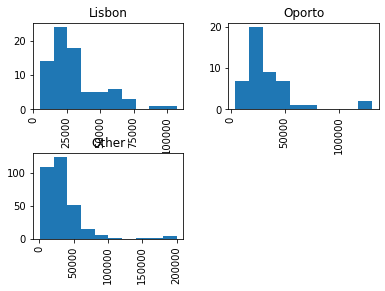

In [26]:
mydata.hist(by='Region',column = 'Total Spend')

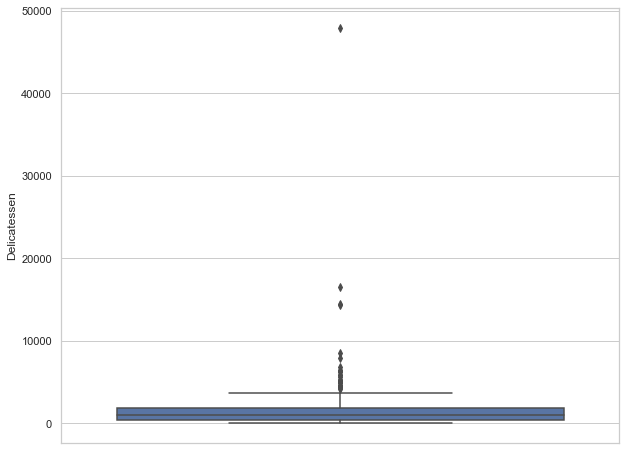

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Delicatessen', data=mydata, orient="v")

In [44]:
surdf = pd.read_csv('Survey.csv')
surdf

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [47]:
pd.crosstab(surdf.Gender, surdf.Employment,margins= True,margins_name='sum')

Employment,Full-Time,Part-Time,Unemployed,sum
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
sum,10,43,9,62


In [48]:
pd.crosstab(surdf.Gender, surdf.Major,margins= True,margins_name='sum')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,sum
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
sum,7,4,11,6,10,7,14,3,62


In [49]:
pd.crosstab(surdf.Gender, surdf['Grad Intention'],margins= True,margins_name='sum')

Grad Intention,No,Undecided,Yes,sum
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
sum,12,22,28,62


In [50]:
pd.crosstab(surdf.Gender, surdf.Computer,margins= True,margins_name='sum')

Computer,Desktop,Laptop,Tablet,sum
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
sum,5,55,2,62


In [52]:
random_prob = surdf.groupby('Gender').size().div(len(surdf))
random_prob

Gender
Female    0.532258
Male      0.467742
dtype: float64

In [58]:
surdf.groupby(['Major','Gender']).size().div(len(surdf)).div(random_prob,axis=0,level='Gender')

Major                   Gender
Accounting              Female    0.090909
                        Male      0.137931
CIS                     Female    0.090909
                        Male      0.034483
Economics/Finance       Female    0.212121
                        Male      0.137931
International Business  Female    0.121212
                        Male      0.068966
Management              Female    0.121212
                        Male      0.206897
Other                   Female    0.090909
                        Male      0.137931
Retailing/Marketing     Female    0.272727
                        Male      0.172414
Undecided               Male      0.103448
dtype: float64

In [59]:
surdf.groupby(['Grad Intention','Gender']).size().div(len(surdf)).div(random_prob,axis=0,level='Gender')

Grad Intention  Gender
No              Female    0.272727
                Male      0.103448
Undecided       Female    0.393939
                Male      0.310345
Yes             Female    0.333333
                Male      0.586207
dtype: float64

In [60]:
surdf.groupby(['Employment','Gender']).size().div(len(surdf)).div(random_prob,axis=0,level='Gender')

Employment  Gender
Full-Time   Female    0.090909
            Male      0.241379
Part-Time   Female    0.727273
            Male      0.655172
Unemployed  Female    0.181818
            Male      0.103448
dtype: float64

In [61]:
surdf.groupby(['Computer','Gender']).size().div(len(surdf)).div(random_prob,axis=0,level='Gender')

Computer  Gender
Desktop   Female    0.060606
          Male      0.103448
Laptop    Female    0.878788
          Male      0.896552
Tablet    Female    0.060606
dtype: float64

In [62]:
stat,pval=stats.normaltest(surdf['Salary'])
print(round(stat,2),round(pval,2))

3.85 0.15


In [64]:
surdf.groupby(['Gender','Major']).size().div(len(surdf))

Gender  Major                 
Female  Accounting                0.048387
        CIS                       0.048387
        Economics/Finance         0.112903
        International Business    0.064516
        Management                0.064516
        Other                     0.048387
        Retailing/Marketing       0.145161
Male    Accounting                0.064516
        CIS                       0.016129
        Economics/Finance         0.064516
        International Business    0.032258
        Management                0.096774
        Other                     0.064516
        Retailing/Marketing       0.080645
        Undecided                 0.048387
dtype: float64

In [67]:
probdf = pd.read_csv('A+&+B+shingles.csv')
probdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [69]:
probdf.dropna(inplace=True)
probdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
A    31 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 744.0 bytes


In [73]:
stats.ttest_1samp(probdf['A'],.35)

Ttest_1sampResult(statistic=-1.6005252585398313, pvalue=0.11996170801033942)

In [74]:
stats.ttest_1samp(probdf['B'],.35)

Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=0.004180954800638363)

In [75]:
stats.ttest_ind(probdf['A'],probdf['B'])

Ttest_indResult(statistic=0.985249977839441, pvalue=0.3284577916404776)